### <center> Predicting Food Safety Inspection Outcomes Using Publicly Available Data </center>
#### <center> Andrew Doss - adoss7@gatech.edu </center>

In [1]:
# Import modules 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 14,
                     'figure.titlesize': 14})
import seaborn as sns
import usaddress
import string
import re
import nltk
import pickle
import scipy
#from helpers import *

Note: skip directly to "Split Training, Validation, and Test Data" heading to bypass initial ETL steps and load a cleaned dataframe directly from a .csv file. 

### Preview Files

In [2]:
# Load raw datasets (see README for data sources, citations, and other details)
restaurants = pd.read_csv('data/restaurants.csv')
reviews = pd.read_csv('data/reviews.csv', parse_dates=['review_date'])
inspections = pd.read_csv('data/Food_Establishment_Inspection_Data.csv',
                          parse_dates=['Inspection Date'])

In [3]:
restaurants.T.head(restaurants.shape[1])

,0,1,2,3,4,5,6,7,8,9,...,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921
restaurant_id,nxeMvqQDJ5ocA4toqRE3CQ,oyxW3ZP60Z9b7F3LciaCjQ,0iyzWPc4C58sAJUAAE-BIg,1IMivcKgsN8xUL5dFKQK3w,OYRdDA88AkyUlUmriMGWxw,bstkaW67SgfoDskqkwhjSg,1XRbtxyDVVMvALaipvNOTw,wNCTJhE4IxwVBNwAiuDTbQ,IbRT1K1TQ7mFXjlIZ9onUw,0rqp9CbHsZZEw1UOUHInWg,...,9DS8d8ChdMZLbNtPnd5Qyw,xqH038QcquJEMm5LIZHd5w,waEWwC7vLpMkMWiFW8Q-Qg,Nc0XTpQl8ABTczfpjYxpnw,7a0RMXo2h7puzsB7btFfPA,YK5eyqqIc9cq2N6QfPUJ6g,qpfE2YYAN4DsKo_46yv2Qg,SFjQO4OoJ2-DGoPNpqBraA,k3E083YjGM8uTnXkHXSA3A,2x240xjHxO1dUKqwM48LqQ
restaurant_name,Ximaica,XO Bistro,Xplosive Mobile Food Truck,Yoshino Teriyaki,Yoroshiku 4649 Japanese Restaurant,Yoshinobo Japanese Restaurant,Yoshino Teriyaki,Yoshio's Teriyaki,Young's Restaurant,Yu Shan,...,Embassy Suites Hotel Seattle - Tacoma Internat...,Elliott's Oyster House,Eloi Traditional Caribbean Food,El Sombrero Family Mexican Restaurant,Easy Street Records and Cafe,Fu Shen Chinese Seafood Restaurant,Frank's Oyster House & Champagne Parlor,The Patio Fine Thai,Volunteer Park Cafe & Marketplace,World Fresh Asian Eatery
rating,3,5,4,3.5,4,3.5,3,4,4,3,...,3.5,4,3.5,3.5,4,4,4,4,4,4
review_count,4,5,11,35,20,3,33,8,17,60,...,20,953,7,87,223,63,126,20,257,21
locality,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,...,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle
street_address,2224 2nd Avenue,2359 10th Ave E,NaN,1010 Madison St,1913 N 45th St,520 S Jackson St,812 12th Ave,3860 Delridge Way SW,9413 16th Ave SW,14553 Bothell Way NE,...,15920 W Valley Hwy,1201 Alaskan Way,4419 Rainier Ave S,4868 Rainier Ave S,4559 California Ave SW,9019 Aurora Ave N,2616 NE 55th St,524 15th Ave E,1501 17th Ave E,1218 Third Ave
categories,[u'Restaurants'],"[u'French', u'Restaurants']","[u'Food', u'Vietnamese', u'Food Trucks', u'Fil...","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'American (Traditional)', u'Chinese', u'Rest...","[u'Chinese', u'Restaurants']",...,"[u'Hotels', u'Hotels & Travel', u'Event Planni...","[u'Seafood', u'Live/Raw Food', u'Restaurants']","[u'Caribbean', u'Restaurants']","[u'Mexican', u'Restaurants']","[u'Music & DVDs', u'Breakfast & Brunch', u'Foo...","[u'Seafood', u'Chinese', u'Restaurants']","[u'Bars', u'American (New)', u'Seafood', u'Cha...","[u'Thai', u'Restaurants']","[u'Food', u'Coffee & Tea', u'Bakeries', u'Amer...","[u'Asian Fusion', u'Restaurants']"


In [4]:
reviews.T.head(reviews.shape[1])

,0,1,2,3,4,5,6,7,8,9,...,283730,283731,283732,283733,283734,283735,283736,283737,283738,283739
review_id,review_8YPABYYCVcruRUBDtEm0SQ,review_h1lXPkpmq9YrPPa5U-koZw,review_m5hPEjiHaucArzTPnmcDPA,review_SypEMow501jtt2WHDKf1WA,review_jZWNPdWBDXWo3ruTt3Z4pQ,review_3u4y2h-WWmk_pRGVz7aV6A,review_VipBNrPF0C3CM6s4kx-swg,review_v21UTW53ttTqFj0aXb__tg,review_Oid6wjr4_m-IqR7_n_BoGw,review_ikqEWBHy4sd5MfPMP3TyxA,...,review_kUHnXkOH3zl0VWQcInH7ZA,review_MW0rdLwhUgjcqJt5YgjVAA,review_765q-uLl_q4fpO0ILvYolA,review_lcVpSFe6VrR8MTAldC6raA,review_FY7_KTrrDereO6kkUVZvlw,review_kMNlm29N0fLfL19sLy4cwQ,review_LJHD8nqRfBOXC3sEoVkX5g,review_LNS0jNHjC7sqxVWXKSDL-g,review_5iYzaBTypTLlW_bHGkbHLA,review_2lrInn3YcjjmiLoR7Zk-Eg
restaurant_id,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,...,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ
user_id,3qWJ06zfWR7LZtvMwMiNsA,3nnAZxAMAGt5ckDHyIBKQg,LXFxtBj842ERHXVgW0DWEw,ddS-8c3JHANKlmGKh3CgOw,R6IJh37_tCMMmu2Dg7MdwQ,F4hSM42lscQ66smSBYlV4g,_EjzSFDvEW_JUwUK3wjFvg,Y9TkkmXe8CfRhuw-vLMcoQ,hc7wi1s4O95cm_1Hez5CUQ,swAnTZSbBcpbUC9kpySOmQ,...,1Govsxb9QandSG3jaAZRPw,7GrICyUUPRa8nYJFy44iOw,1alYBTQkvmi2wTuXopodzA,Zt1Zs23ifbxTCDhvH46pBA,UzlNrlozddhgTCyhjlx53A,EzrOl-r6T-li3axcXnguHw,mQTGEMa_0O4BtXBcnuUNRg,_LPFiWRT4VuZfE6EyeYk5A,Q7uEN9LOWVLSHgimsq5dyQ,Rmlw1aCJJsgifgCyixGIZA
locality,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,...,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle
review_date,2012-06-26 00:00:00,2012-11-29 00:00:00,2012-07-16 00:00:00,2012-03-29 00:00:00,2012-10-19 00:00:00,2012-06-14 00:00:00,2011-12-14 00:00:00,2011-07-15 00:00:00,2011-12-16 00:00:00,2012-07-09 00:00:00,...,2011-02-24 00:00:00,2010-12-09 00:00:00,2011-09-14 00:00:00,2011-06-01 00:00:00,2008-11-09 00:00:00,2011-08-18 00:00:00,2010-12-04 00:00:00,2009-01-07 00:00:00,2009-07-02 00:00:00,2011-04-16 00:00:00
rating,4,3,2,2,2,4,4,4,4,2,...,4,4,5,3,4,4,4,4,4,5
content,I highly recommend the Pad Thai. This is right...,It might be the best place for lunch within a ...,"Meh... &#160;I was hoping for better, but the ...",Given that you can stand at the signpost at th...,"10/2010: 123 Thai Food/Queen Anne/Seattle, Wa....","For fast food Thai, i am really impressed. &#1...",3 1/2The food was okay but nothing special. Go...,"I work nearby, and at one point this few block...","Talk about a SURPRISE! &#160;I have to admit, ...",I was taking a class at the nearby Cascade Hea...,...,This is definitely my favourite place to grab ...,El capitan and I went here after craving some ...,I looooove this place! &#160;I get the same th...,"I've never eaten here, just walked in and out ...",While I was initially treated like I had the w...,very unassuming hole-in-the-wall. i would have...,"A spare, well-focused neighborhood specialty g...",Great Injera.,"As noted in other reviews, this place is reall...",Spent 5 weeks living in Ethiopia and this plac...


In [5]:
inspections.T.head(inspections.shape[1])

,0,1,2,3,4,5,6,7,8,9,...,271165,271166,271167,271168,271169,271170,271171,271172,271173,271174
Name,#7064 ARCO AM/PM,"@ THE SHACK, LLC","@ THE SHACK, LLC","@ THE SHACK, LLC","@ THE SHACK, LLC","@ THE SHACK, LLC",100 LB CLAM,100 LB CLAM,100 LB CLAM,100 LB CLAM,...,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI
Program Identifier,#7064 ARCO AM/PM,SHACK COFFEE,SHACK COFFEE,SHACK COFFEE,SHACK COFFEE,SHACK COFFEE,100 LB CLAM,100 LB CLAM,100 LB CLAM,100 LB CLAM,...,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI
Inspection Date,2018-02-08 00:00:00,2018-10-03 00:00:00,2018-10-03 00:00:00,2018-04-02 00:00:00,2017-07-27 00:00:00,2017-06-16 00:00:00,2017-07-24 00:00:00,2017-07-24 00:00:00,2017-07-24 00:00:00,2017-07-24 00:00:00,...,2018-12-07 00:00:00,2018-09-28 00:00:00,2018-09-28 00:00:00,2018-09-28 00:00:00,2018-04-19 00:00:00,2017-12-04 00:00:00,2017-06-20 00:00:00,2017-03-21 00:00:00,2017-03-21 00:00:00,2016-10-10 00:00:00
Description,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,...,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III
Address,3648 AUBURN WAY N,2920 SW AVALON WAY,2920 SW AVALON WAY,2920 SW AVALON WAY,2920 SW AVALON WAY,2920 SW AVALON WAY,1001 FAIRVIEW AVE N Unit 1700A,1001 FAIRVIEW AVE N Unit 1700A,1001 FAIRVIEW AVE N Unit 1700A,1001 FAIRVIEW AVE N Unit 1700A,...,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE
City,AUBURN,Seattle,Seattle,Seattle,Seattle,Seattle,SEATTLE,SEATTLE,SEATTLE,SEATTLE,...,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah
Zip Code,98002,98126,98126,98126,98126,98126,98109,98109,98109,98109,...,98029,98029,98029,98029,98029,98029,98029,98029,98029,98029
Phone,(916) 295-2150,(206) 938-5665,(206) 938-5665,(206) 938-5665,(206) 938-5665,(206) 938-5665,(206) 369-2978,(206) 369-2978,(206) 369-2978,(206) 369-2978,...,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474
Longitude,-122.222,-122.371,-122.371,-122.371,-122.371,-122.371,-122.332,-122.332,-122.332,-122.332,...,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043
Latitude,47.3397,47.5704,47.5704,47.5704,47.5704,47.5704,47.629,47.629,47.629,47.629,...,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518


In [6]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 7 columns):
restaurant_id      3922 non-null object
restaurant_name    3922 non-null object
rating             3908 non-null float64
review_count       3922 non-null int64
locality           3922 non-null object
street_address     3868 non-null object
categories         3922 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 214.6+ KB


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283740 entries, 0 to 283739
Data columns (total 7 columns):
review_id        283740 non-null object
restaurant_id    283740 non-null object
user_id          283740 non-null object
locality         283740 non-null object
review_date      283740 non-null datetime64[ns]
rating           283740 non-null int64
content          283740 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 15.2+ MB


In [8]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271175 entries, 0 to 271174
Data columns (total 22 columns):
Name                          271175 non-null object
Program Identifier            271175 non-null object
Inspection Date               270682 non-null datetime64[ns]
Description                   271175 non-null object
Address                       271175 non-null object
City                          271175 non-null object
Zip Code                      271175 non-null int64
Phone                         188830 non-null object
Longitude                     271145 non-null float64
Latitude                      271145 non-null float64
Inspection Business Name      270682 non-null object
Inspection Type               270682 non-null object
Inspection Score              270626 non-null float64
Inspection Result             270682 non-null object
Inspection Closed Business    270682 non-null object
Violation Type                155262 non-null object
Violation Description         1

### Explore Date Ranges and Initial Filtering

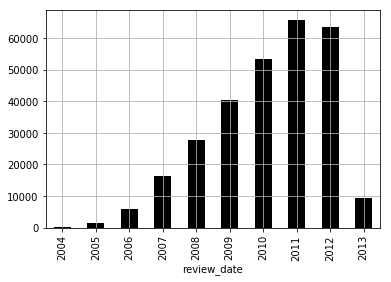

In [9]:
# View count of of reviews by year
reviews.groupby(reviews["review_date"].dt.year) \
                                      .count()['review_id'] \
                                      .plot(kind="bar", color='black')
plt.grid()
plt.show()

Yelp! was founded in Q4 2004. While increasing, the total number of reviews is very low from 2004-2006. 2013 only appears to be lower because the dataset ends on Feb. 21 of that year. I will drop the years 2004-2006 and focus on years with a larger volume of Yelp! data. 

In [10]:
# Filter out data before 2007 and after 2013 
reviews = reviews.loc[(reviews.review_date.dt.year >= 2007)]
inspections = inspections.loc[(inspections['Inspection Date'].dt.year >= 2007) 
                              & (inspections['Inspection Date'].dt.year < 2014)]

In [11]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121206 entries, 27 to 271156
Data columns (total 22 columns):
Name                          121206 non-null object
Program Identifier            121206 non-null object
Inspection Date               121206 non-null datetime64[ns]
Description                   121206 non-null object
Address                       121206 non-null object
City                          121206 non-null object
Zip Code                      121206 non-null int64
Phone                         77813 non-null object
Longitude                     121206 non-null float64
Latitude                      121206 non-null float64
Inspection Business Name      121206 non-null object
Inspection Type               121206 non-null object
Inspection Score              121158 non-null float64
Inspection Result             121206 non-null object
Inspection Closed Business    121206 non-null object
Violation Type                65964 non-null object
Violation Description         65

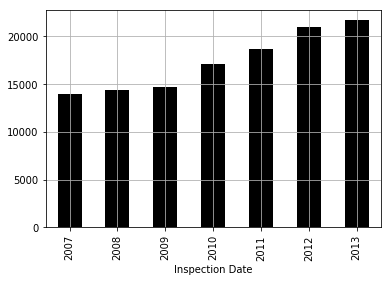

In [12]:
# Review count of inspections per year
inspections.groupby(inspections["Inspection Date"].dt.year) \
                                                  .count()['Name'] \
                                                  .plot(kind="bar", color='black')
plt.grid()
plt.show()

The inspection data includes one row per violation, or a single row per inspection if no violations were found. I will merge all violations corresponding to each single inspection into a single row. First, I need to standardize and encode the violation descriptions. 

In [13]:
inspections.rename(columns={'Violation Description':'violation_descr',},
                   inplace=True)
violation_lists = inspections['violation_descr'].str.split(' - ')

In [14]:
def get_len(x):
    '''Wrapper to handle missing values when checking lengths'''
    try:
        return len(x)
    except:
        return -1

In [15]:
# Not all violations are coded, but all violations have a standard description.
# Create a map and then use to code all violations consistently

# Make series of lists split on hyphen between code and description
violation_lists = inspections['violation_descr'].str.split(' - ')

description_to_code = {}
code_to_description = {}
for i in range(violation_lists.shape[0]):
    
    # Not every row has a violation description 
    try:
        violation_num, description = violation_lists.iloc[i]
        
        # Confirms valid violation code format parsed
        if len(violation_num) == 4:
            # Add code-description pair to two-way maps
            if description not in description_to_code:
                description_to_code[description] = int(violation_num)
                code_to_description[violation_num] = description
    except:
        continue
        
# Try to encode, else return -1
def violation_encoder(x):
    # Handle rows without violation
    try:
        # Handle description-only cases
        if len(x) == 1:
            return description_to_code[x[0]]

        # Handle code-description cases
        elif len(x) == 2:
            return description_to_code[x[1]]
    except TypeError:
        return -1
        
inspections['violation_descr'] = violation_lists.apply(violation_encoder)
inspections['violation_descr'].fillna(-1, inplace=True)

In [16]:
# Pickle the code to description map for later use
with open('data/violation_codes.pickle', 'wb') as handle:
    pickle.dump(code_to_description, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
# Aggregate violation types per restaurant-inspection combination
data_agg = inspections.groupby(['Business_ID', 'Inspection_Serial_Num'], as_index=False) \
                      .agg(dict(violation_descr = lambda x: tuple(x.unique())))

In [18]:
# Update column name to reflect encoding
data_agg.rename(columns={'violation_descr':'violation_code'}, inplace=True)

In [19]:
# Merge new violation code lists back into pre-aggregation inspection data
inspections = inspections.merge(data_agg, how='left', on=['Business_ID', 'Inspection_Serial_Num'])

In [20]:
# Removing columns that do not need to be aggregated per inspection
drop_inspection_cols = ['Violation Type', 'Violation Points', 'Violation_Record_ID', 'Inspection Business Name', 'Grade',
                        'Phone', 'violation_descr']
inspections.drop(drop_inspection_cols, axis=1, inplace=True)
inspections.drop_duplicates(inplace=True)

In [21]:
# Evaluate the three types of inspections and outcomes
pd.crosstab(inspections['Inspection Result'], inspections['Inspection Type'],
            margins=True)

Inspection Type,Consultation/Education - Field,Return Inspection,Routine Inspection/Field Review,All
Inspection Result,,,,
Baseline Data,39,8,38,85
Complete,22421,360,316,23097
Confirmed,1,0,2,3
Exchange information,1,0,0,1
In Compliance,1,2,0,3
Incomplete,99,39,230,368
Increased Knowledge,1,0,0,1
Needs Assessment,1,0,0,1
No Longer At Location,0,0,3,3


"Consultation/Education - Field" refers to visits that are scheduled with the business in advance. "Routine Inspection/Field Review" refers to unannounced inspections/audits, while "Return Inspection" refers to a return inspection with cause.  

Almost all "Consulatation/Education - Field" visits are simply noted as "Complete" and very few have any violations or unsatisfactory outcome. I will focus on the routine inspections for my predictive modeling because those are the inspections that require prioritization (the consulation/education visits are not primarily focused on compliance and the return inspections are likely compulsory regardless of a predictive model). 

I will retain the return inspections now; however, for the purpose of defining the correct intrainspection windows. 

In [22]:
# Drop consulation/education samples
inspections = inspections.loc[inspections['Inspection Type'] != 'Consultation/Education - Field']

In [23]:
# Map boolean values for restaurant closure to int for later count aggregation
inspections['Inspection Closed Business'] = inspections['Inspection Closed Business'].map({False:0,True:1})

### Entity Resolution

This analysis requires entity resolution between the Yelp! reviews/restaurants data and the King County food inspection records. Unfortunately, the available Yelp! reviews/restaurants data only provides street address and restaurant name. The King County inspection records provide full address data. Fortunately, this is easier than a general address resolution problem as each independent set is limited to the space of Seattle area restaurant addresses (with the exception of typos/erroneous data).

Approach:
1. Normalize street numbers and street names and left join inspections to restaurant list on these keys
2. Require at least one matching, non-trivial token between names. This is a tradeoff between conservatism in matching and potential loss of valid information (e.g. some restaurants may have a separate name in Yelp! from the business name on record with the County). However, without any name matching, there is a risk of mismatching restaurants that share the same street address (e.g. malls and other multi-use building) or have occupied the same location at different times. The list of trivial tokens was built up by manually inspecting records multijoining and addings words that were frequently the cause.

In [24]:
# Street address and name parsing functions
def parse_address(s, target):
    '''Wrapper to parse target token from street address'''
    if pd.notnull(s):
        try: 
            token = usaddress.tag(s)[0][target]
            if isinstance(token, str):
                token = token.lower()
            return token
        except:
            return pd.np.nan
    else:
        return pd.np.nan
    
def parse_name(s):
    '''Parse names into normalized sets of non-trivial tokens'''
    if pd.notnull(s):
        s = s.lower()
        # Citation: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
        exclude = set(string.punctuation)
        s = ''.join(ch for ch in s if ch not in exclude)
        s = set(s.split())
        trivial_tokens = {'llc', 'corp', 'co', 'the', '&', 'and', 'HS', 'of', 'at', 'center',
                          'seattle', 'restaurant', 'cafe', 'gourmet', 'grill', 'deli', 'anthonys',
                          'mexican', 'bar', 'bagels', 'alki', 'leschi', 'asian', 'pub', 'lounge',
                          'lake', 'union', 'chicken', 'bakery', 'mobile', 'catering','pizza','a',
                          'la', 'in', 'food', 'n', 'thai'}
        return s - trivial_tokens
    else:
        return pd.np.nan

In [25]:
# Create elements for address matching
restaurants['street_num'] = restaurants['street_address'].apply(parse_address,
                                                                target='AddressNumber')
restaurants['street_name'] = restaurants['street_address'].apply(parse_address,
                                                                 target='StreetName')
inspections['street_num'] = inspections['Address'].apply(parse_address,
                                                         target='AddressNumber')
inspections['street_name'] = inspections['Address'].apply(parse_address,
                                                          target='StreetName')

# Create elements for name matching
restaurants['name_tokens'] = restaurants['restaurant_name'].apply(parse_name)
inspections['name_tokens'] = inspections['Program Identifier'].apply(parse_name)

In [26]:
# First separate restaurants with and without street_num and street_name
restaurants = restaurants.loc[restaurants['street_num'].notnull() \
                              & restaurants['street_name'].notnull()]
print(f'Proportion of restaurants with street address: {restaurants.shape[0] / restaurants.shape[0]}')

Proportion of restaurants with street address: 1.0


Unfortunately, I have to drop the ~5% of restaurants that do not have a street number and street name. 

Next, I need to deal with redundant Yelp! listings.

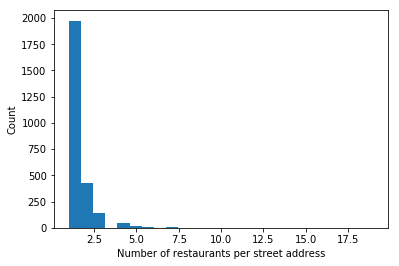

Mean: 1.4109589041095891, Median: 1.0


In [27]:
# Explore distribution of repeated Yelp! listings
dist = restaurants.groupby(['street_num', 'street_name']) \
                  .count()['restaurant_id'] \
                  .sort_values(ascending=False)
plt.hist(dist, bins=25)
plt.xlabel('Number of restaurants per street address')
plt.ylabel('Count')
plt.show()
print(f'Mean: {dist.mean()}, Median: {dist.median()}')

In [28]:
# First find all restaurants with matching street number and street name
joined_restaurants = restaurants.merge(restaurants, how='inner', on=['street_num', 'street_name'])
joined_restaurants = joined_restaurants.loc[joined_restaurants['restaurant_id_x'] != joined_restaurants['restaurant_id_y'],:]

In [29]:
# Compute boolean mask for rows where names have at least a partial match
rest_name_match_idx = []
for r_name, i_name in zip(joined_restaurants['name_tokens_x'],
                          joined_restaurants['name_tokens_y']):
    try:
        if len(r_name.intersection(i_name)) > 0:
            rest_name_match_idx.append(True)
        else:
            rest_name_match_idx.append(False)            
    except:
        # Handles cases where there is no name match
        rest_name_match_idx.append(False)

In [30]:
# Filter down to restaurant pairs with name matches
joined_restaurants = joined_restaurants.loc[rest_name_match_idx,:]
print(f'Matching street address and name produces {joined_restaurants.shape[0] // 2} pairs.')

Matching street address and name produces 154 pairs.


In [31]:
# Build maps between redundant restaurant listings
from collections import defaultdict
redundant_rest_map = defaultdict(list)

for _, row in joined_restaurants.iterrows():
    redundant_rest_map[row.restaurant_id_x].append(row.restaurant_id_y)

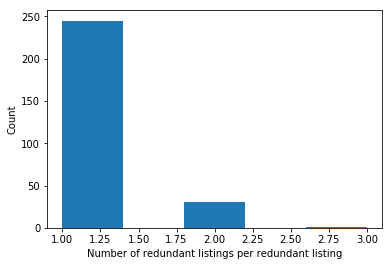

Mean: 1.1159420289855073, Median: 1.0


In [32]:
# Explore distribution of number of redundant listings
dist = []
for _, value in redundant_rest_map.items():
    dist.append(len(value))
dist = pd.Series(dist)
plt.hist(dist, bins=5)
plt.xlabel('Number of redundant listings per redundant listing')
plt.ylabel('Count')
plt.show()
print(f'Mean: {dist.mean()}, Median: {dist.median()}')

For the most part, there are only duplicate listings but some triplicate and higher sets do occur. 

Next, I need to merge the redundant listings in the main datasets. I will accomplish this by arbitrary picking a master restaurant_id for each, and then recoding the reviews and consolidating name tokens (it is best to retain all name variations for best possible joins with inspection data).

In [33]:
# Obtain a master restaurant_id for each redundant set
covered = set()
master_rest_ids = set()
for key, value in redundant_rest_map.items():
    if key not in covered:
        master_rest_ids.add(key)
        covered.add(key)
        for v in value:
            covered.add(v)

In [34]:
# Now build a dict mapping from all redundant ids back to a master id
rest_id_recode = dict()
for master_rest_id in master_rest_ids:
    for dependent in redundant_rest_map[master_rest_id]:
        rest_id_recode[dependent] = master_rest_id

In [35]:
# Now, remap rest_ids in restaurant and review datasets
def recode_rest_id(x):
    if x in rest_id_recode:
        return rest_id_recode[x]
    else:
        return x
restaurants['restaurant_id'] = restaurants['restaurant_id'].apply(recode_rest_id)
reviews['restaurant_id'] = reviews['restaurant_id'].apply(recode_rest_id)

In [36]:
# Get all name tokens per restaurant_id
rest_id_names = defaultdict(str)
rest_id_name_tokens = defaultdict(set)
rest_id_categories = defaultdict(str)

for _, row in restaurants.iterrows():
    rest_id_names[row.restaurant_id] += row.restaurant_name + ' '
    rest_id_categories[row.restaurant_id] += row.categories + ' '
    for token in row.name_tokens:
        rest_id_name_tokens[row.restaurant_id].add(token)

In [37]:
# Drop unneeded columns, then remap merged names and token sets
restaurants.drop(['rating', 'review_count', 'locality', 'street_address'],
                 axis=1, inplace=True)

In [38]:
for _, row in restaurants.iterrows():
    row.restaurant_name = rest_id_names[row.restaurant_id]
    row.categories = rest_id_categories[row.restaurant_id]
    row.name_tokens = rest_id_name_tokens[row.restaurant_id]

In [39]:
restaurants.drop_duplicates(subset='restaurant_id', inplace=True)

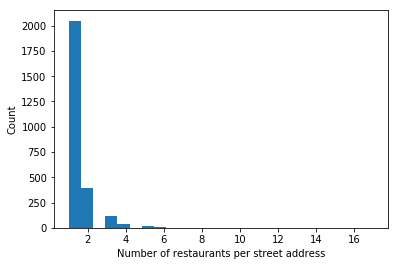

Mean: 1.356925418569254, Median: 1.0


In [40]:
# Explore distribution of repeated Yelp! listings
dist = restaurants.groupby(['street_num', 'street_name']) \
                         .count()['restaurant_id'] \
                         .sort_values(ascending=False)
plt.hist(dist, bins=25)
plt.xlabel('Number of restaurants per street address')
plt.ylabel('Count')
plt.show()
print(f'Mean: {dist.mean()}, Median: {dist.median()}')

There are now fewer restraurants per address than before, but the average still exceeds 1 because multiple restaurants can occupy the same address at different times and the same address can apply to multiple restaurants if a multi-use building. 

Finally, I will merge the inspection records onto the restaurants.

In [41]:
# Merge inspections onto restaurant list using street number and street name
restaurants = restaurants.merge(inspections, how='left', on=['street_num', 'street_name'], suffixes=('_r', '_i'))

In [42]:
# Compute boolean mask for rows where names have at least a partial match
name_match_idx = []
for r_name, i_name in zip(restaurants['name_tokens_r'],
                          restaurants['name_tokens_i']):
    try:
        if len(r_name.intersection(i_name)) > 0:
            name_match_idx.append(True)
        else:
            name_match_idx.append(False)            
    except:
        # Handles cases where there is no name match
        name_match_idx.append(False)

In [43]:
# Evaluate how many restaurants joined to any inspection records, as well as how many had at least
# a partial name match as defined above

total_rest_count = restaurants.restaurant_id.nunique()
joined_rest_count = restaurants.loc[restaurants['Inspection Result'] \
                               .notnull()] \
                               .restaurant_id \
                               .nunique()
name_match_count = restaurants.loc[pd.Series(name_match_idx)].restaurant_id.nunique()

print(f'Proportion of restaurants joined to any inspection records: {joined_rest_count / total_rest_count}')
print(f'Proportion of restaurants with inspection and name match: {name_match_count / total_rest_count}')

Proportion of restaurants joined to any inspection records: 0.4845765563656758
Proportion of restaurants with inspection and name match: 0.29584969153112733


About half of the restaurants are matched to inspection results using street number and name. Only about a third of the restaurants match on both inspection result addresses and business names. I'll take a look at some of the restaurants that could not match on street number and name.

In [44]:
# Look at some of the addresses that are failing to match
view_cols = ['restaurant_name','street_num','street_name']
restaurants.loc[restaurants['Inspection Result'].isnull(),view_cols].head(10)

,restaurant_name,street_num,street_name
0,Ximaica,2224,2nd
1,XO Bistro,2359,10th
17,Yoshino Teriyaki,812,12th
18,Yoshio's Teriyaki,3860,delridge
61,Yummy Bowl,215,pine
62,Yummy Bites,4131,university
117,Oya Teriyaki Oya Teriyaki,7114,marginal
175,The Old Spaghetti Factory,2801,elliott
183,The Original Deli,1215,4th
184,The Original Deli,818,1st


The street numbers and names seem fine, so I manually checked the inspection records to look for a possible error in my entity resolution approach. I did not find any similar addresses. It is possible that not every restaurant had unannounced inspections, that there are errors in addresses (e.g. typos or Yelp! address does not match official inspection address). In either case, a more robust entity resolution might be interesting in a future extension.  

The name matching ended up being very significant, as without name matching, the same inspections get mapped to multiple restaurants. I have not kept all my exploratory work in this notebook, but it can be shown that the partial non-trivial name match largely mitigates the duplicate inspection issue. 

In [45]:
# Select the rows with partial name match
restaurants = restaurants.loc[name_match_idx]
restaurants = restaurants.loc[restaurants['Inspection Result'].notnull()]

If the entity resolution was good, I should now have very few repeated inspection records. I will check below.

In [46]:
num_joined_rec = restaurants.shape[0]
num_unique_inspect = restaurants.Inspection_Serial_Num.nunique()
print(f'Number of joined records: {num_joined_rec}')
print(f'Number of unique inspections in joined records: {num_unique_inspect}')
print(f'% Redundant inspection records: {100 * (num_joined_rec - num_unique_inspect) / num_unique_inspect}')

Number of joined records: 11375
Number of unique inspections in joined records: 11343
% Redundant inspection records: 0.2821123159657939


1% is pretty good, although it has come at the cost of filtering out some of the records that could not join under a more robust entity resolution procedure.

For now, I will consider that good enough and drop redundant inspection records at random.

In [47]:
restaurants.drop_duplicates('Inspection_Serial_Num', inplace=True)

### Aggregating Inspection Windows and Time Series Feature Engineering

In [48]:
# Drop features that are no longer required. Will keep some address data for geocoding.
# I am also throwing out the Yelp! rating and review count as they are
# at a snapshot in time, I will use actual cumulative numbers from the reviews themselves
# to reflect what data is available at the time of each inspection. 
post_merge_drop = ['street_num', 'street_name', 'name_tokens_r',
                   'Name', 'Business_ID', 'name_tokens_i']
restaurants.drop(post_merge_drop, axis=1, inplace=True)

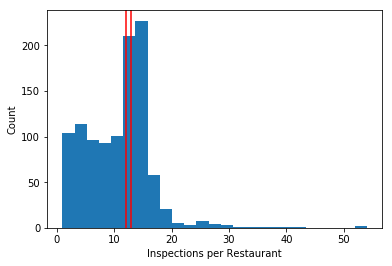

Mean inspections per restaurant: 10.761859582542694, Median inspections per restaurant: 12.0


In [49]:
# Explore distribution of inspections per restaurant (note: not normalized for duration retaurant has been open, or on Yelp)
dist = restaurants.groupby(restaurants["restaurant_id"]).count()['Inspection_Serial_Num']
plt.hist(dist, bins=25)
plt.xlabel('Inspections per Restaurant')
plt.ylabel('Count')
plt.axvline(12, color='red')
plt.axvline(13, color='red')
plt.show()
print(f'Mean inspections per restaurant: {dist.mean()}, Median inspections per restaurant: {dist.median()}')

The plot below shows that, conditional on being open during the entire dataset window, the number of inspections is mostly within the expected 11-14 inspection range (roughly 2 inspections occur per year per business) with a heavier right tail for the restaurants that receive return inspections with cause and outliers to the right (those are explained more below). 

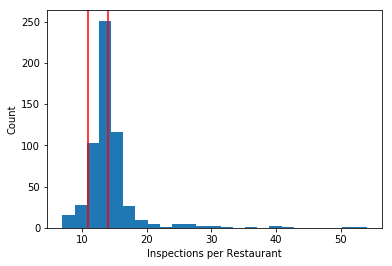

Mean inspections per restaurant: 14.234782608695653, Median inspections per restaurant: 14.0


In [50]:
# Get date of first inspection per restaurant and plot only restaurants open for entire window
first_inspect = restaurants.groupby(restaurants["restaurant_id"], as_index=True).min()['Inspection Date']
last_inspect = restaurants.groupby(restaurants["restaurant_id"], as_index=True).max()['Inspection Date']
inspect_counts = restaurants.groupby(restaurants["restaurant_id"], as_index=True).count()['Inspection Result']
mean_score = restaurants.groupby(restaurants["restaurant_id"], as_index=True).mean()['Inspection Score']
restaurant_name = restaurants.groupby(restaurants["restaurant_id"], as_index=True).first()['restaurant_name']
filtered_restaurants = pd.DataFrame({'first_inspect':first_inspect, 'last_inspect':last_inspect, 'inspect_counts':inspect_counts,
                                     'mean_score':mean_score, 'restaurant_name': restaurant_name})
filtered_restaurants = filtered_restaurants.loc[(filtered_restaurants['first_inspect'].dt.year == 2007) &
                                                (filtered_restaurants['last_inspect'].dt.year >= 2012),:]
dist = filtered_restaurants['inspect_counts']
plt.hist(dist, bins=25)
plt.xlabel('Inspections per Restaurant')
plt.ylabel('Count')
plt.axvline(11, color='red')
plt.axvline(14, color='red')
plt.show()
print(f'Mean inspections per restaurant: {dist.mean()}, Median inspections per restaurant: {dist.median()}')

Explore for relationship between number of inspections and mean inspection score. As expected, there is a positive relationship (dense cluster of points at less) between mean inspection score and number of inspections. The outliers far right, especially far lower right, reflect businesses that only have one Yelp! entity but include many sub-units that are inspected separately by the County. They follow a different distribution and it's unlikely Yelp! reviews are as useful for those cases.

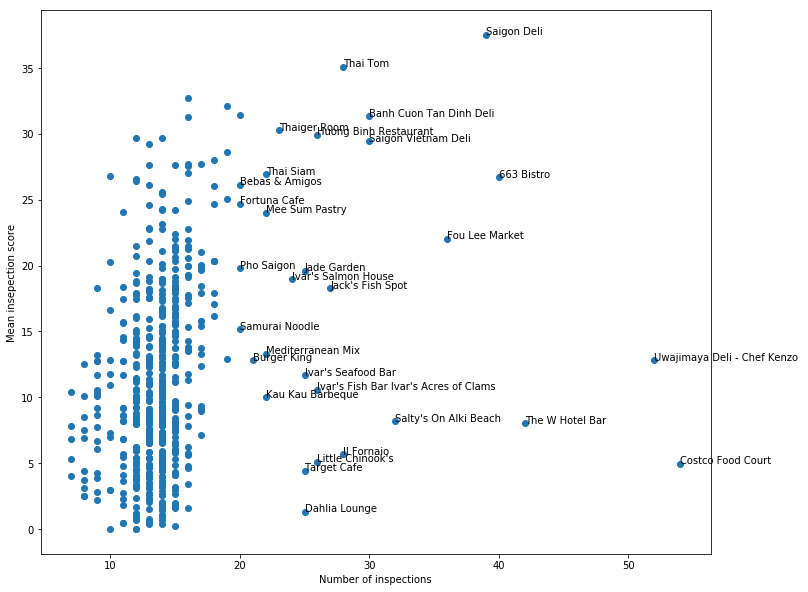

In [51]:
plt.figure(figsize=(12,10))
plt.scatter(filtered_restaurants['inspect_counts'], filtered_restaurants['mean_score'])
label_data = filtered_restaurants.loc[:,['inspect_counts', 'mean_score', 'restaurant_name']] \
                                 .sort_values('inspect_counts', ascending=False) \
                                 .iloc[:30,:]
for _, row in label_data.iterrows():
    plt.text(row.inspect_counts, row.mean_score, row.restaurant_name, fontsize=10)
plt.xlabel('Number of inspections')
plt.ylabel('Mean insepection score')
plt.show()

For now, I will crudely drop all restaurants with greater than 22 inspections.

In [52]:
restaurants = restaurants.join(filtered_restaurants.loc[:,'inspect_counts'], how='left', on='restaurant_id')
restaurants.fillna(0, inplace=True)
restaurants = restaurants.loc[restaurants['inspect_counts'] <= 22,:]
restaurants.drop('inspect_counts', inplace=True, axis=1)

Next I create some basic time series features. These could be adjusted later based on model crossvalidation. For now, I do not implement any sophisticated smoothing/exponential decay type features.

In [53]:
# Sort inspections by date within each restaurant's group
restaurants = (restaurants.groupby('restaurant_id', as_index=False)
                          .apply(lambda df : df.sort_values(by='Inspection Date')) 
                          .reset_index(drop=True))

# Add features for date of last inspection, score of last inspection, result of last inspection,
# interval since last inspection, violations at last inspection
restaurants['last_date'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Date']
                                       .transform(lambda x : x.shift(1)))
restaurants['last_score'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Score'] 
                                        .transform(lambda x : x.shift(1)))
restaurants['last_result'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Result']
                                         .transform(lambda x : x.shift(1)))
restaurants['inspection_interval'] = restaurants['Inspection Date'] - restaurants['last_date']
restaurants['violation_code'] = (restaurants.groupby('restaurant_id', as_index=False)['violation_code'] 
                                            .transform(lambda x : x.shift(1)))

# Compute cumulative score, cumulative inspection count, cumulative closures, and mean (previous) inspection score
restaurants['cum_score'] = restaurants.groupby('restaurant_id', as_index=False)['Inspection Score'].cumsum()
restaurants['cum_score'] = (restaurants.groupby('restaurant_id', as_index=False)['cum_score'] 
                                       .transform(lambda x : x.shift(1)))
restaurants['cum_inspections'] = 1
restaurants['cum_inspections'] = restaurants.groupby('restaurant_id', as_index=False)['cum_inspections'].cumsum()
restaurants['cum_inspections'] = (restaurants.groupby('restaurant_id', as_index=False)['cum_inspections'] 
                                             .transform(lambda x : x.shift(1)))
restaurants['Inspection Closed Business'] = restaurants.groupby('restaurant_id', as_index=False)['Inspection Closed Business'].cumsum()
restaurants['Inspection Closed Business'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Closed Business']
                                                        .transform(lambda x : x.shift(1)))
restaurants['mean_score'] = restaurants['cum_score'] / restaurants['cum_inspections']

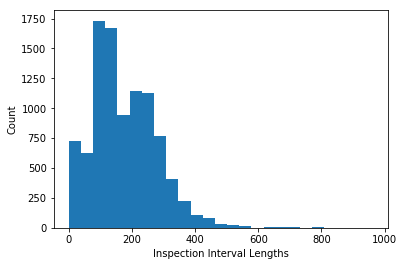

Mean inspection interval: 175.5424484295636, Median inspection interval: 157.0


In [54]:
# Check distribution of all inspection intervals.
dist = restaurants['inspection_interval'].dt.days.dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Interval Lengths')
plt.ylabel('Count')
plt.show()
print(f'Mean inspection interval: {dist.mean()}, Median inspection interval: {dist.median()}')

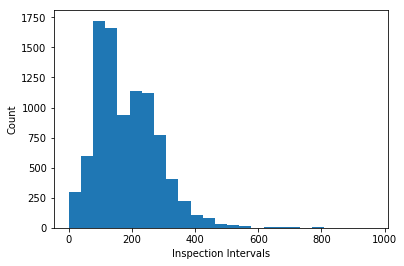

Mean inspection interval: 183.48689097662225, Median inspection interval: 166.0


In [55]:
# Check distribution of only routine (not return) inspections. It looks similar except for the loss of
# very short inspection windows. This makes sense, given that follow-up inspections would be scheduled
# on a shorter time frame than a routine visit.
dist = restaurants.loc[restaurants['Inspection Type'] == 'Routine Inspection/Field Review']['inspection_interval'].dt.days.dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Intervals')
plt.ylabel('Count')
plt.show()
print(f'Mean inspection interval: {dist.mean()}, Median inspection interval: {dist.median()}')

Now, I will map the review data to the restaurants.

In [56]:
# Merge reviews onto restaurants
data = restaurants.merge(reviews, how='left', on='restaurant_id')

In [57]:
# Need to filter down to only reviews matching each restaurant and inspection window
data_filtered = data.loc[(data['review_date'] >= data['last_date']) &
                                           (data['review_date'] < data['Inspection Date'])]

In [58]:
# Also retain inspections that did not match to any reviews
to_drop = set(data_filtered['Inspection_Serial_Num'].unique())
data = data.loc[data['Inspection_Serial_Num'].apply(lambda x: x not in to_drop),:]

In [59]:
# Combine both sets of records
data = pd.concat([data_filtered, data], axis=0)

In [60]:
# Fill na reviews with empty string
data['content'].fillna('', inplace=True)

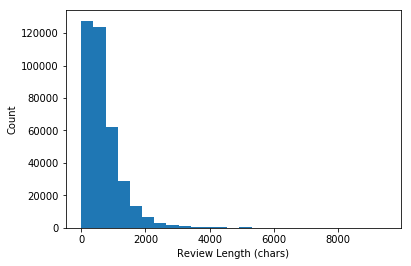

Mean review length: 672.6659826912718, Median review length: 529.0


In [61]:
# Check distribution of review lengths in characters
dist = data['content'].apply(len)
plt.hist(dist, bins=25)
plt.xlabel('Review Length (chars)')
plt.ylabel('Count')
plt.show()
print(f'Mean review length: {dist.mean()}, Median review length: {dist.median()}')

I will drop the first inspection for each restaurant due to missing features (e.g. previous scores). It may be of some use to train a model for making predictions for restaurants with no prior inspections; however, it also seems likely that inspecting a restaurant with no inspection history would be a priority regardless. 

For this prototype, I will drop the first inspection for each restaurant due to missing features (e.g. previous inspection score, cumulative inspection score, etc.). However, training models that handle these missing values might be important for a production application that could be used on restaurants without an inspection history (at the same time, it seems reasonable that restaurants without any history need to be prioritized regardless of any predictive model). 

In [62]:
# First inspection for each restaurant includes nan's for time series forward shifts
data.dropna(subset=['last_score'],inplace=True)

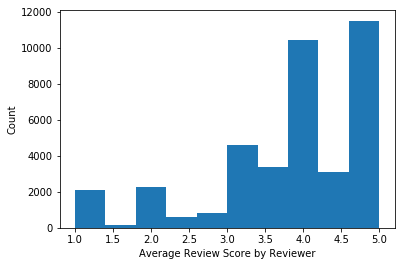

Mean of mean review score per reviewer: 3.8352655989315876, Median of mean review score per reviewer: 4.0


In [63]:
# Check distribution of average review score by reviewer 
dist = data.groupby(data["user_id"])['rating'].mean()
plt.hist(dist, bins=10)
plt.xlabel('Average Review Score by Reviewer')
plt.ylabel('Count')
plt.show()
print(f'Mean of mean review score per reviewer: {dist.mean()}, Median of mean review score per reviewer: {dist.median()}')

Most reviewers give mostly high ratings, while some reviewers consistently give very low ratings. This could be a real effect, or fake reviewers might be trying to help or hurt particular restaurants. Detecting fake reviews could be a project in its own right. For now, I leave the review scores as is, but many normalization approaches could be applied.

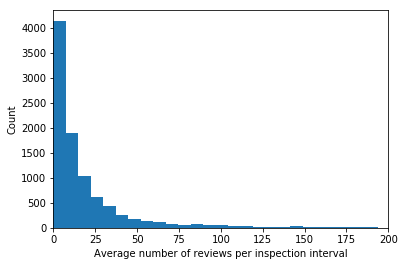

Mean number of reviews per inspection interval: 25.15274863617289
Median number of reviews per inspection interval: 9.0


In [64]:
# Check distribution of number of reviews per inspection interval 
dist = data.groupby(['Inspection Date','restaurant_id'])['user_id'].count()
plt.hist(dist, bins=200)
plt.xlim(0,200)
plt.xlabel('Average number of reviews per inspection interval')
plt.ylabel('Count')
plt.show()
print(f'Mean number of reviews per inspection interval: {dist.mean()}')
print(f'Median number of reviews per inspection interval: {dist.median()}')

I will aggregate the review text 3 ways: all reviews and positive/negative Yelp! rating reviews. This will provide options for later text analysis. 

In [65]:
# Now need to aggregate reviews per each restaurant/inspection combination
data_agg = data.groupby(['restaurant_id','Inspection Date'], as_index=False).agg(dict(rating = 'mean', 
                                                                                  review_date = 'count',
                                                                                  content = lambda x: '%s'%'\n'.join(x)))
data_agg.rename(columns={'content':'all_reviews'}, inplace=True)

In [66]:
# Now aggregating only non-positive reviews
data_agg_neg = (data.loc[data['rating'] <=3,:]
                    .groupby(['restaurant_id','Inspection Date'], as_index=False)
                    .agg(dict(content = lambda x: '%s'%'\n'.join(x))))
data_agg_neg.rename(columns={'content':'neg_reviews'}, inplace=True)

In [67]:
# Now aggregating only positive reviews
data_agg_pos = (data.loc[data['rating'] >3,:]
                    .groupby(['restaurant_id','Inspection Date'], as_index=False)
                    .agg(dict(content = lambda x: '%s'%'\n'.join(x))))
data_agg_pos.rename(columns={'content':'pos_reviews'}, inplace=True)

In [68]:
# Merge aggregated features back into main dataset
drop_columns = ['review_id', 'user_id', 'locality', 'review_date', 'rating',
                'content', 'Inspection_Serial_Num']
data = (data_agg.merge(data.drop(drop_columns, axis=1),
                       on=['restaurant_id', 'Inspection Date'], how='left')
                .drop_duplicates())
data = data.merge(data_agg_neg, on=['restaurant_id', 'Inspection Date'], how='left')
data = data.merge(data_agg_pos, on=['restaurant_id', 'Inspection Date'], how='left')

Rename columns with nicer formatting. 

In [69]:
data.rename(columns={'Inspection Date':'date', 'norm_rating':'avg_norm_rating',
                     'review_date':'num_reviews_intv', 'content':'reviews',
                     'rating':'avg_rating', 'review_count':'num_reviews_cum',
                     'Description':'rest_type', 'Address':'address',
                     'City':'city', 'Zip Code':'zip', 'Longitude':'long',
                     'Latitude':'lat', 'Inspection Type':'inspect_type',
                     'Inspection Score':'inspect_score', 'Inspection Result':'inspect_result',
                     'cum_inspections':'cum_num_inspect', 'inspection_interval':'inspect_intv',
                     'Inspection Closed Business':'cum_closures'}, inplace=True)

I can now drop the return inspections as well, so that the entire dataset is for routine inspections.

In [70]:
data = data.loc[data['inspect_type'] != 'Return Inspection',:]

Finally, I will review the distribution of inspection scores overall.

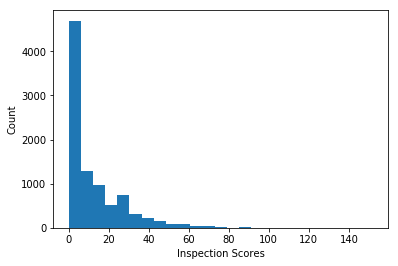

Mean of inspection scores: 11.746121913917413, Median of inspection scores: 5.0


In [71]:
# Check distribution of remaining inspection scores 
dist = data['inspect_score'].dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Scores')
plt.ylabel('Count')
plt.show()
print(f'Mean of inspection scores: {dist.mean()}, Median of inspection scores: {dist.median()}')

### Categorical (Except Review Text) Feature Engineering

In [72]:
# Reset to fresh index
data.reset_index(drop=True, inplace=True)

In [73]:
# Get additional date features, convert time since last inspection to int
dt_attributes = ['quarter', 'year', 'month', 'dayofweek']
for attr in dt_attributes:
    data[attr] = data['date'].apply(lambda x : getattr(x, attr))
data['inspect_intv'] = data['inspect_intv'].apply(lambda x : getattr(x, 'days'))

In [74]:
# Convert cuisine categories from strings to lists for later analysis
def proc_cusine_categories(s):
    new_s = s.split('\', u\'')
    new_s[0] = new_s[0].lstrip('[u\'')
    new_s[-1] = new_s[-1].rstrip('\']')
    return tuple(new_s)

data['categories'] = data['categories'].apply(proc_cusine_categories)

In [75]:
# Need to standardize city names
data['city'] = data['city'].str.lower()

In [76]:
# Clean up result types and drop ambiguous results
results_map = {'Satisfactory':0, 'Unsatisfactory':1, 'Complete':0,
               'Not Accessible':2, 'Incomplete':2, 'Baseline Data':2,
               'Not Confirmed':2, 'Not Permitted':2}
data['inspect_result'] = data['inspect_result'].map(results_map)
data = data.loc[data['inspect_result'] != 2]

In [77]:
data['last_result'] = data['last_result'].map(results_map)

### Load and Merge Population Data

In [78]:
# First need to export list of unique addresses for geocoding to census tracts
pre_addresses = data.loc[:,['address','city','zip']].drop_duplicates()
pre_addresses['State'] = 'WA'
pre_addresses.to_csv('data/pre_geocode_addresses.csv')

In [79]:
# Used Texas A&M geocoding services and now importing results back in
post_addresses = pd.read_csv('data/post_geocode_addresses.csv')
post_addresses.drop_duplicates(inplace=True)

In [80]:
# Merge back into main dataset
data['address'] = data['address'].str.strip()
data = data.merge(post_addresses, how='left', on=['address','city','zip'])

In [81]:
# Drop columns no longer needed and reformat tract for later join
data.drop(['address','city','zip'], axis=1, inplace=True)
data['tract'] = (data['tract'] * 100).astype(int) 

I will use the 2011 5-year ACS data which roughly covers the timespan of this analysis. Technically, some of the data represents dates after some samples, but this is a reasonable approximation and can be revisited if the community features appear to be very significant. I have left some code in place below where I had previously tried using ACS data from prior years, but the temporal tract numbering changes would require a more complicated temporal geocoding which may be something to explore further if these features end up being important for the final predictor. 

In [82]:
year_map = {2007:2011, 2008:2011, 2009:2011, 2010:2011, 2011:2011,
            2012:2011, 2013:2011}
data['acs_join_year'] = data['year'].apply(lambda x: year_map[x])

In [83]:
# Unfortunately, ACS files have remained column order but have not maintained exact names over time.
# I will have to compile data by index and rename before merging into main file. 

na_values=['*','**','-']

acs_idx_names = {1:'tract', 3:'total_pop', 75:'median_age', 83:'%_male', 107:'%_white',
                 115:'%_black', 131:'%_asian', 147:'%_other_race', 163:'%_hispanic_latino',
                 195:'speak_eng_+_other_lang', 203:'speak_other_lang', 227:'%_married', 
                 259:'%_ed_less_than_hs', 291:'%_ed_grad_prof_deg', 371:'median_income',
                 387:'%_poverty'}

idxs, col_names = list(acs_idx_names.keys()), list(acs_idx_names.values())
acs_data = []

for year in ['2011']:
    temp_acs_data = pd.read_csv(f'data/ACS_{year[2:]}_5YR_S0601_with_ann.csv',
                                na_values=na_values)
    temp_acs_data = temp_acs_data.iloc[:,idxs]
    temp_acs_data.columns=col_names
    temp_acs_data['acs_join_year'] = int(year)
    # Extract tract portion of FIPS code
    temp_acs_data['tract'] = temp_acs_data['tract'].apply(lambda x : int(str(x)[-6:]))
    # Fill missing values with medians
    temp_acs_data.fillna(temp_acs_data.median())
    acs_data.append(temp_acs_data)
    
# Finally, concatenate into single dataframe
acs_data = pd.concat(acs_data, axis=0)

In [84]:
# Merge population data into main dataset
data = data.merge(acs_data, how='left', on=['tract','acs_join_year'])
data.drop('acs_join_year', axis=1, inplace=True)

Finally, I will review the distribution of inspection scores overall, as well as condition on the categorical inspection result. 

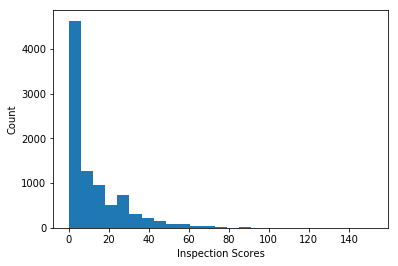

Mean of inspection scores: 11.82052411363136, Median of inspection scores: 5.0


In [85]:
# Check distribution of normalized review scores 
dist = data['inspect_score'].dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Scores')
plt.ylabel('Count')
plt.show()
print(f'Mean of inspection scores: {dist.mean()}, Median of inspection scores: {dist.median()}')

In [86]:
# Save dataframe for quick restart after this point
data.to_csv('data/data.csv', index=False)

### Split Training, Validation, and Test Data

The temporal aspect of this problem makes splitting validation and test sets more challenging. For example, a standard k-folds cross-validation approach and randomly drawn test set would not be appropriate. Under that approach, the model could train on inspection results that occurred after some of the prediction events. 

Ideally, I would have plenty of data to split training, validation, and test sets by date (i.e. all validation data occurs after training data, all test data occurs after validation data). However, I only have ~8000 inspection windows to work with.

I will split out the most recent 20% for test to ensure the final check on results is not using future data for training. However, I will use 10-fold cross-validation on the 80% training data, accepting the potential for some bias in the results in exchange for the opportunity to train and validate on more data. If I did use a hard three-way partition, the validation set would be better representing the time component of the problem, but the relatively small training set and single validation set would cause the cross-validation metrics to have higher variance which is problematic in a different way. 

In [87]:
# Read dataframe from disk
import ast
data = pd.read_csv('data/data.csv',
                   converters={"violation_code": ast.literal_eval, "categories": ast.literal_eval})